## Indian Railway Finance Corp  Time Series StockPrice prediction Using models
## LinearRegression, ExponentialSmoothing, Naive bayes and attain 76% Accuracy



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing , Holt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

Downloaded the  latest data from [investing.com](https://in.investing.com/equities/indian-railway-finance-historical-data) 

In [88]:
df= pd.read_csv(r"C:\Users\TAUFEEK AHMED\Downloads\IRFC analysis - Sheet1 (1).csv")

In [89]:
df.shape

(812, 7)

In [8]:
df.head()

,Date,Price,Open,High,Low,Volume,Change(%)
0,2021-02-01,25.10,25.25,25.40,24.90,72044464,1.21%
1,2021-02-02,24.75,25.45,25.45,24.70,36735442,-1.39%
2,2021-02-03,24.25,24.80,24.90,24.05,45816269,-2.02%
3,2021-02-04,25.35,24.25,25.80,23.85,88486029,4.54%
4,2021-02-05,25.70,25.60,26.20,25.55,56318695,1.38%


In [11]:
df.tail()

,Date,Price,Open,High,Low,Volume,Change(%)
807,2024-05-07,149.80,154.45,155.10,148.50,29872858,-3.76%
808,2024-05-08,152.25,149.00,153.75,146.30,25210562,1.64%
809,2024-05-09,147.05,152.00,152.90,146.15,21064246,-3.42%
810,2024-05-10,148.05,147.75,149.55,142.45,27205055,0.68%
811,2024-05-13,145.90,148.05,148.45,143.10,20343612,-1.45%


In [10]:
print(f"{df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

2021-02-01 to 2024-05-13


In [90]:
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df.head()

,Date,Price,Open,High,Low,Volume,Change(%)
0,2021-02-01,25.10,25.25,25.40,24.90,72044464,1.21%
1,2021-02-02,24.75,25.45,25.45,24.70,36735442,-1.39%
2,2021-02-03,24.25,24.80,24.90,24.05,45816269,-2.02%
3,2021-02-04,25.35,24.25,25.80,23.85,88486029,4.54%
4,2021-02-05,25.70,25.60,26.20,25.55,56318695,1.38%


In [91]:
df.drop(columns = ['Open' , 'High','Low','Volume','Change(%)'], inplace=True)

In [92]:
df = df.set_index('Date')

In [14]:
df.head()

,Price
Date,
2021-02-01,25.10
2021-02-02,24.75
2021-02-03,24.25
2021-02-04,25.35
2021-02-05,25.70


In [93]:
complete_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

In [95]:
df = df.reindex(complete_dates)
df.index.name = 'date'

In [96]:
df['Price'].fillna(method='ffill', inplace=True)

In [99]:
df.head()

,Price
date,
2021-02-01,25.10
2021-02-02,24.75
2021-02-03,24.25
2021-02-04,25.35
2021-02-05,25.70


In [107]:
df.shape

(1198, 1)

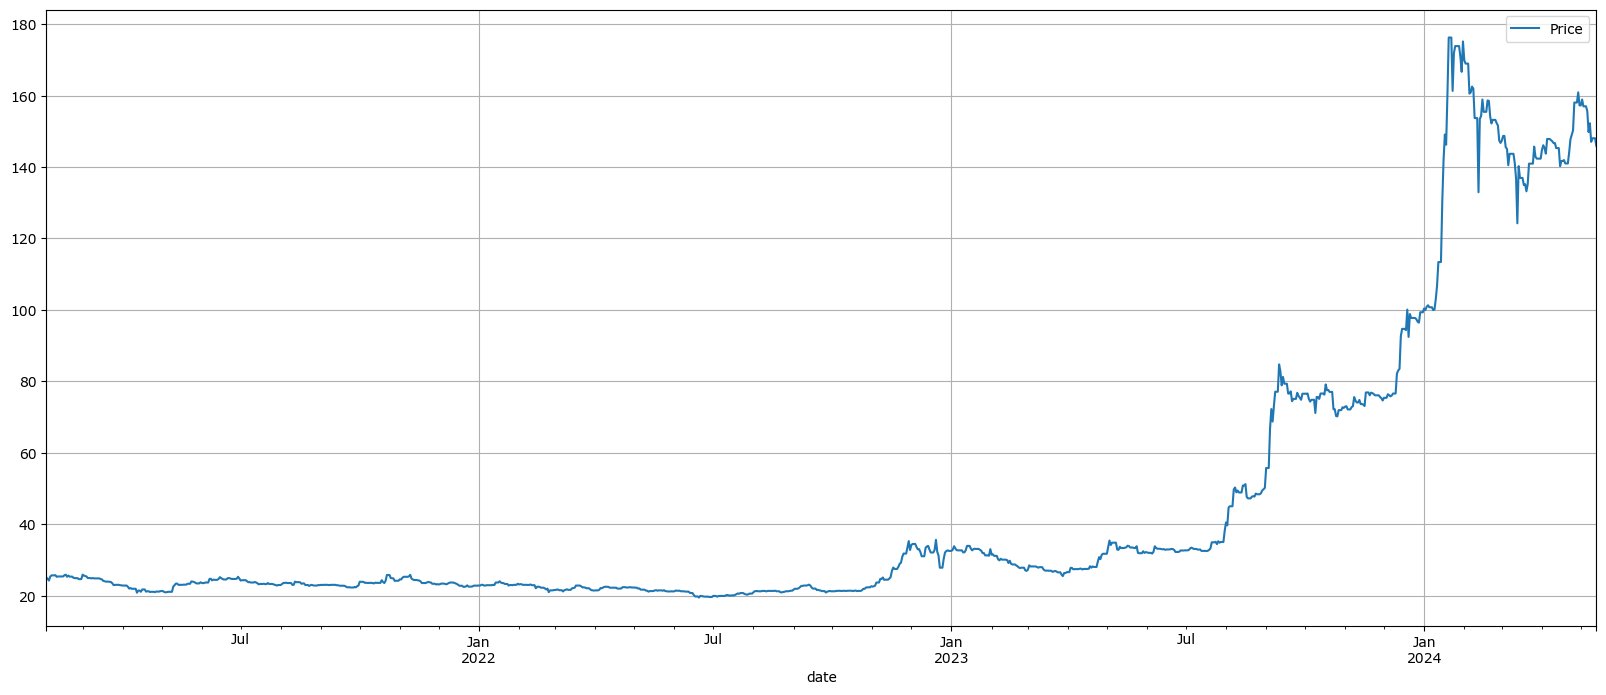

In [100]:
df.plot(figsize = (20,8))
plt.grid()
plt.show()

In [101]:
round(df.describe())

,Price
count,1198.0
mean,45.0
std,40.0
min,20.0
25%,23.0
50%,25.0
75%,35.0
max,176.0


<Axes: xlabel='date'>

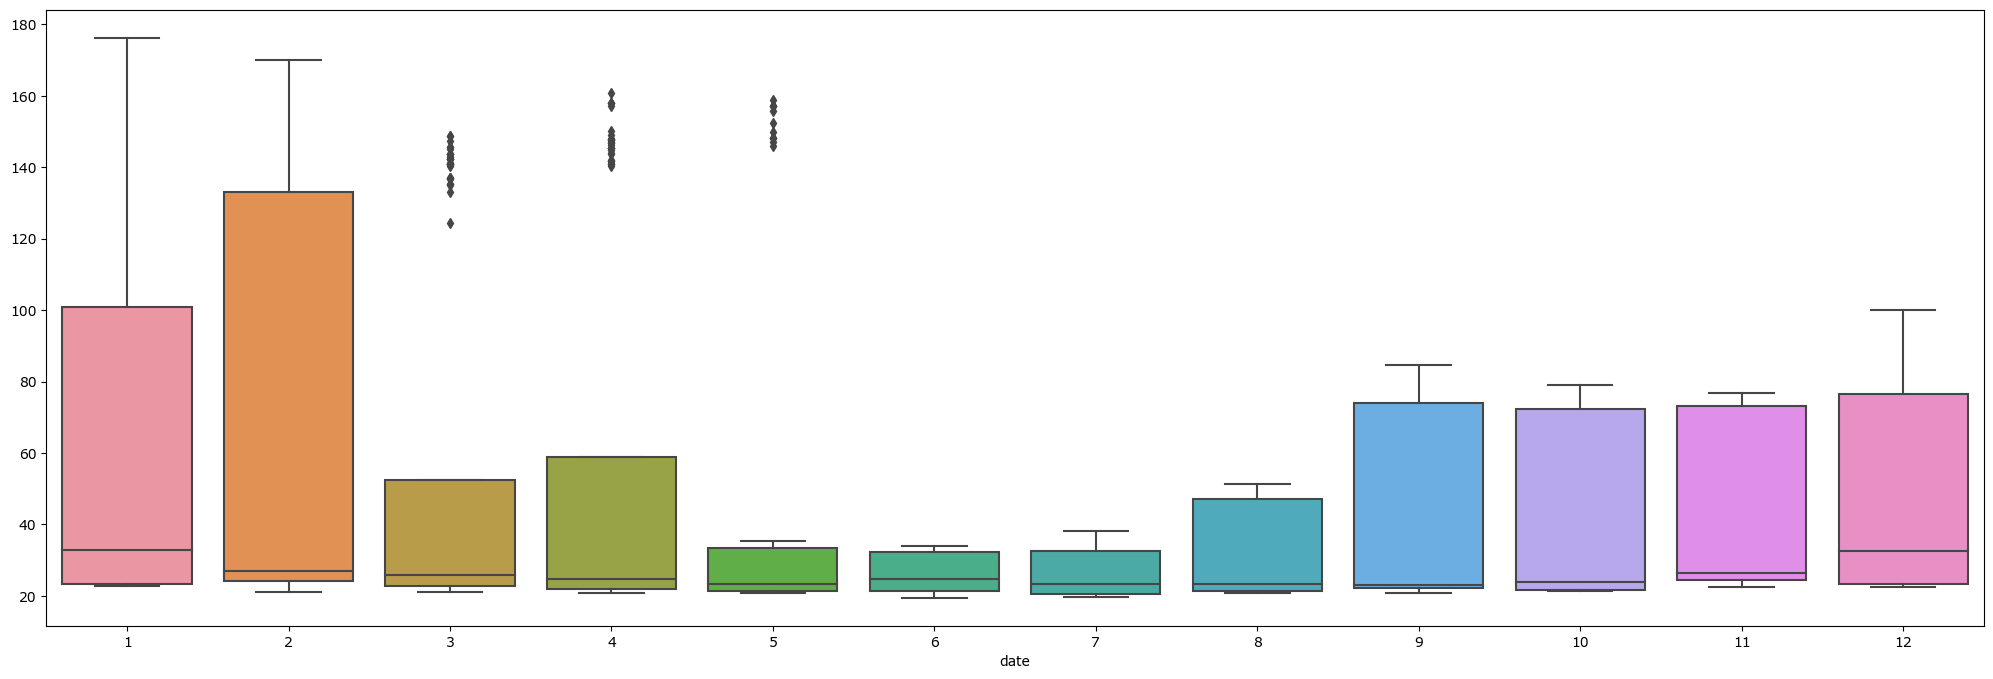

In [102]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.month , y=df.values[:,0],ax=ax )

<Axes: xlabel='date'>

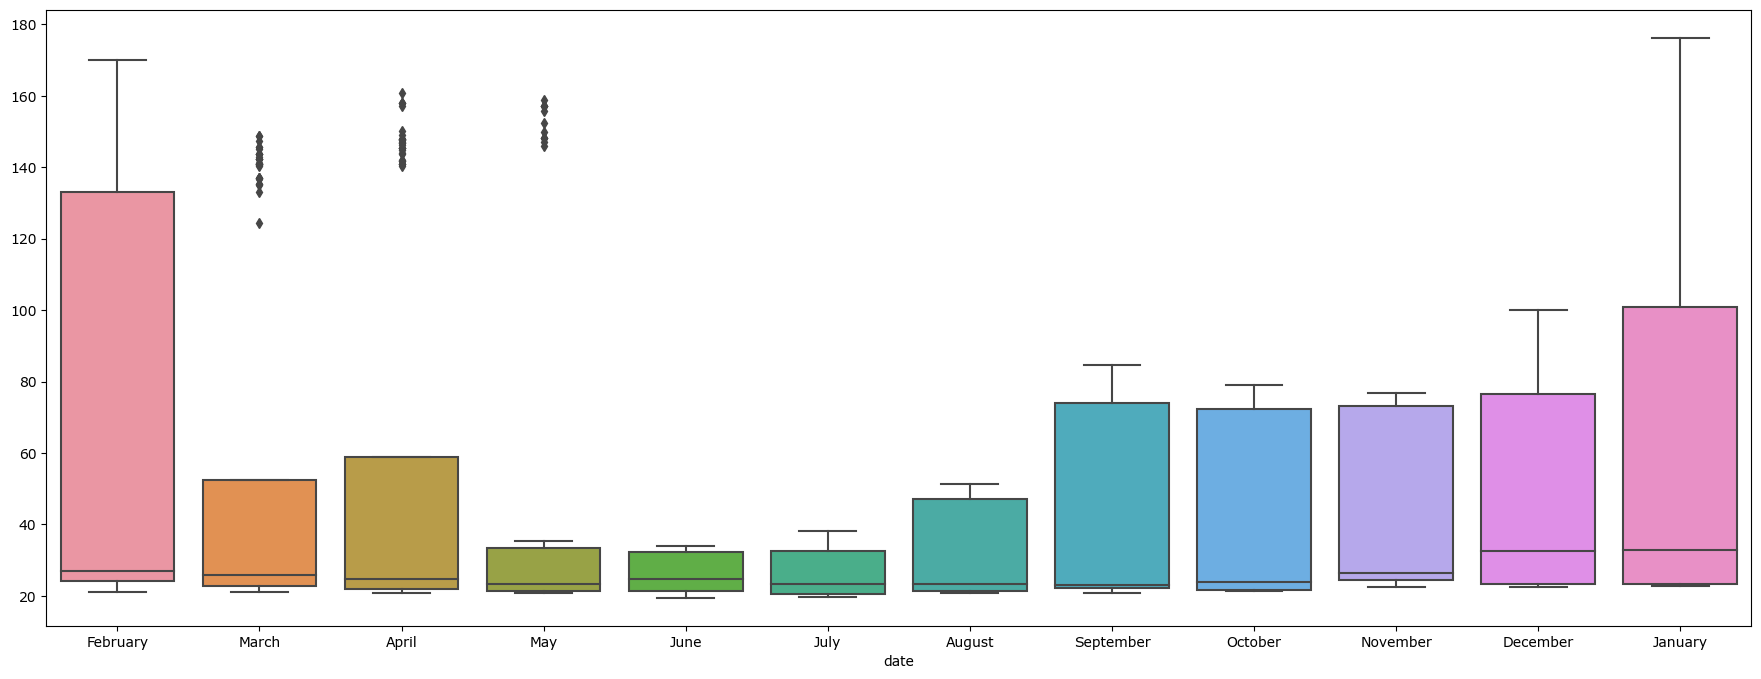

In [103]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name() , y =df.values[:,0], ax=ax)

<Axes: xlabel='date'>

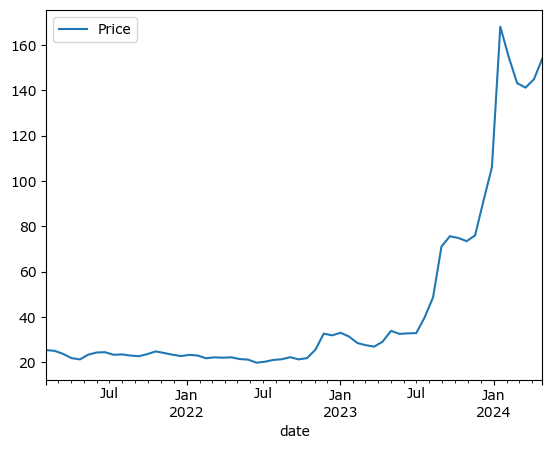

In [104]:
df_10days = df.resample('20D').mean()
df_10days.plot()

In [105]:
df_1 =df.groupby(df.index.month).mean().rename(columns = {'Price' : 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.month).std().rename(columns = {'Price' : 'Std'}) , left_index = True , right_index =True)
df_1['Cov_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
date,,,
1,64.353226,55.160396,85.72
2,59.189823,57.460507,97.08
3,53.563306,50.660486,94.58
4,54.887083,53.735156,97.90
5,41.385849,42.063224,101.64


<Axes: xlabel='date'>

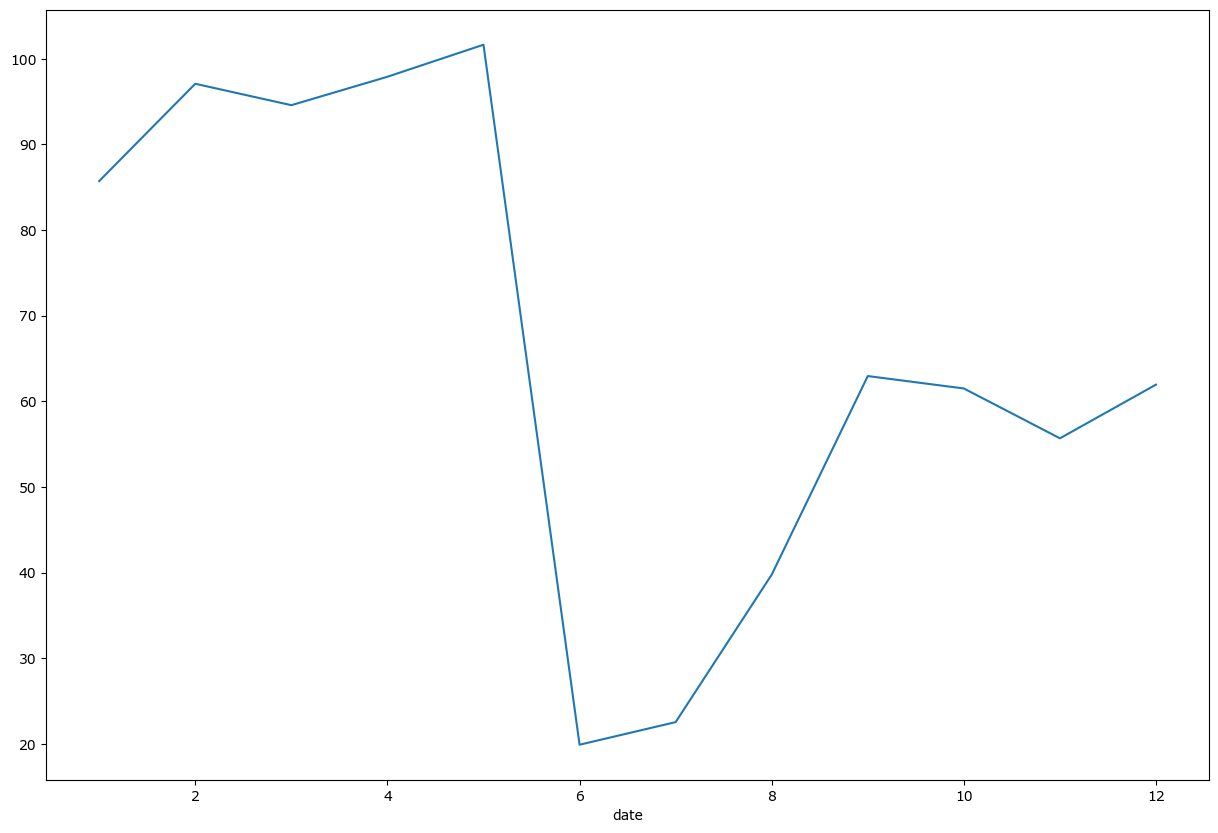

In [106]:
fig , ax = plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot()


In [132]:
train = df[0:1000]
test = df[1000:1192]

In [133]:
print(train.shape)

(1000, 1)


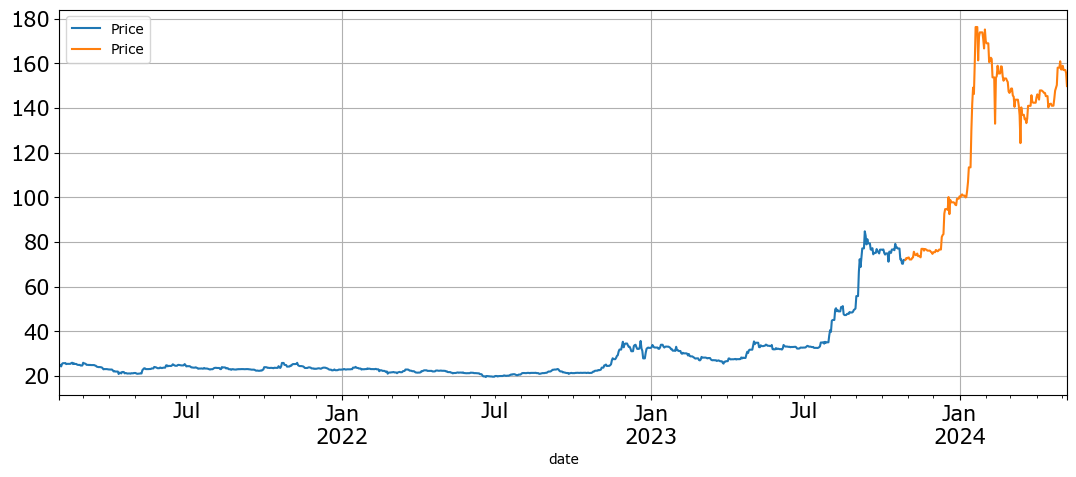

In [134]:
train['Price'].plot(figsize =(13,5), fontsize =15)
test['Price'].plot(figsize =(13,5), fontsize =15)
plt.grid()
plt.legend()

In [135]:
train_time = [i+1 for i in range(len(train))]
test_time =[i + len(train) for i in range(len(test))]
len(train_time) , len(test_time)

(1000, 192)

In [136]:
LR_train = train.copy()
LR_test= test.copy()

In [137]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [138]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


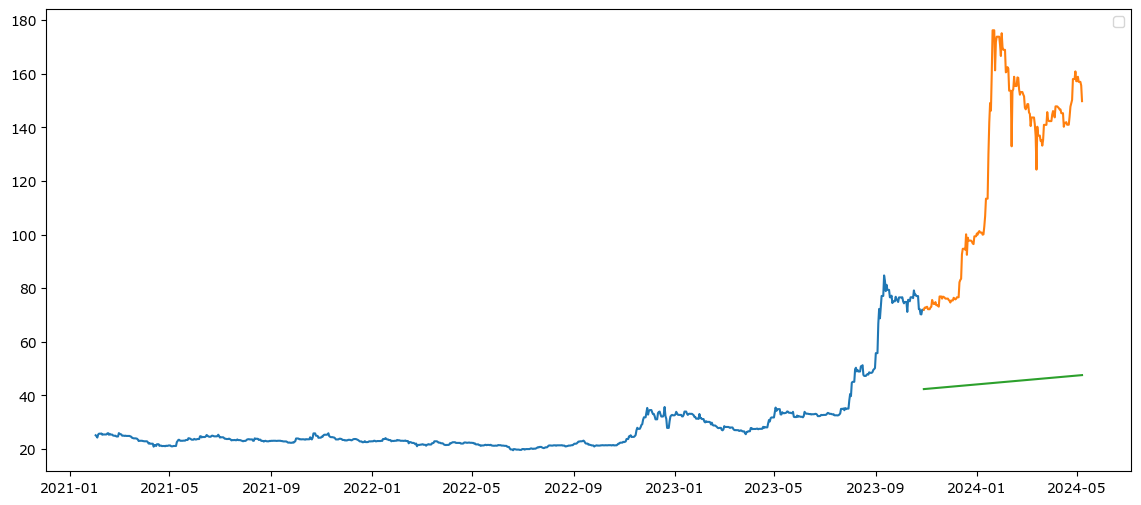

In [139]:
test_prediction_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_prediction_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'])
plt.plot(test['Price'])
plt.plot(LR_test['forecast'])
plt.legend()

In [140]:
def mape(actual,pred):
    return round((np.mean(abs(actual - pred)/actual))*100,2)

In [141]:
mape_model1_test = mape(test['Price'].values,test_prediction_model1)
print(mape_model1_test)

60.77


In [142]:
results = pd.DataFrame({'Test Mape(%)' : [mape_model1_test]} , index = ['RegressionOnTime'])
results

,Test Mape(%)
RegressionOnTime,60.77


In [143]:
Naive_train = train.copy()
Naive_test = test.copy()

In [144]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price'])) - 1]
Naive_test['naive'].head()                                                                

date
2023-10-29    71.95
2023-10-30    71.95
2023-10-31    71.95
2023-11-01    71.95
2023-11-02    71.95
Freq: D, Name: naive, dtype: float64

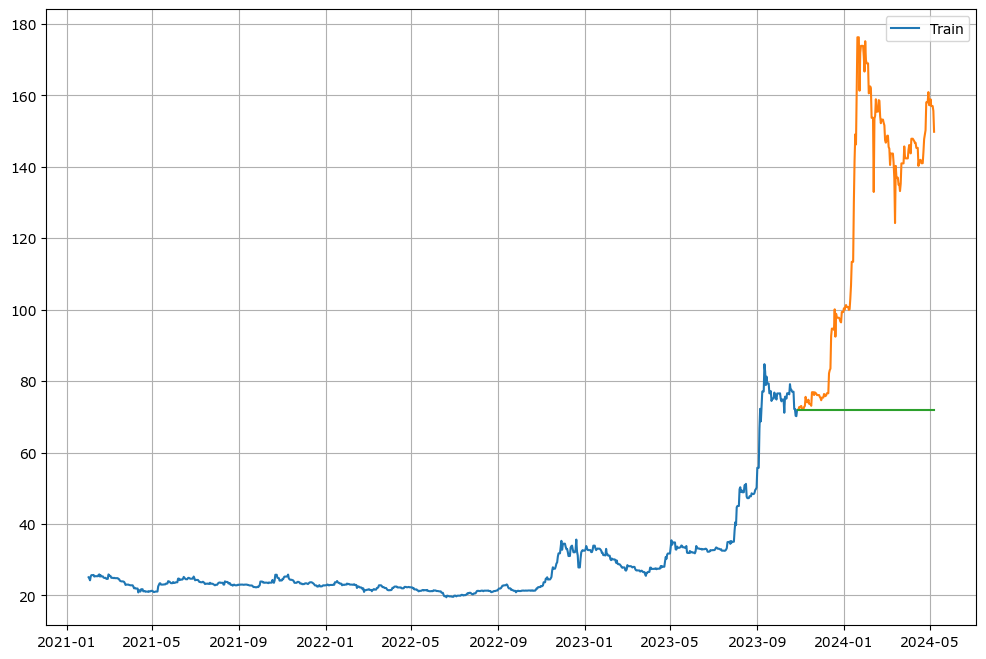

In [145]:
plt.figure(figsize = (12,8))
plt.plot(Naive_train['Price'], label = 'Train')
plt.plot(test['Price'])
plt.plot(Naive_test['naive'])
plt.legend()
plt.grid()

In [146]:
mape_model2_test = mape(test['Price'].values,Naive_test['naive'].values)
print(mape_model2_test)

36.62


In [147]:
df.head()

,Price
date,
2021-02-01,25.10
2021-02-02,24.75
2021-02-03,24.25
2021-02-04,25.35
2021-02-05,25.70


In [161]:
final_model = ExponentialSmoothing(df,
                                   trend = 'additive',
                                   seasonal ='additive').fit(smoothing_level =0,
                                                            smoothing_trend = 0.1,
                                                            smoothing_seasonal = 0.1)

In [162]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print(Mape_final_model)

24.02


In [163]:
prediction = final_model.forecast(steps = len(test))

In [164]:
pred_df = pd.DataFrame({'lower_CI': prediction- 1.96*np.std(final_model.resid,ddof=1),
                       'prediction' : prediction,
                       'upper_ci' : prediction+1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
2024-05-14,117.363781,144.562844,171.761907
2024-05-15,116.931893,144.130956,171.330019
2024-05-16,117.605370,144.804433,172.003496
2024-05-17,118.578647,145.777710,172.976773
2024-05-18,118.920458,146.119521,173.318584


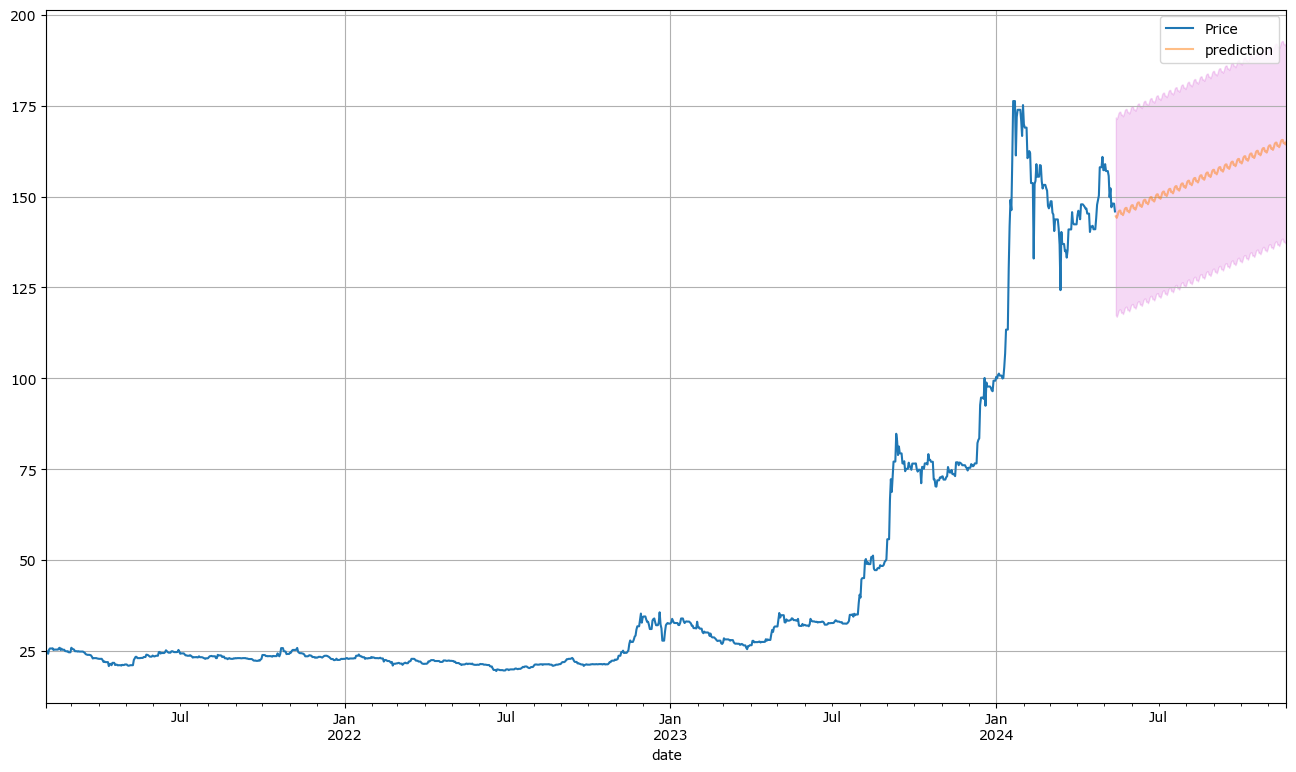

In [165]:
axis = df.plot(label = 'Actual' , figsize = (16,9))
pred_df['prediction'].plot(ax =axis , alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'], pred_df['upper_ci'],color ='m' , alpha=.15)
plt.legend()
plt.grid()